In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
data_df = pd.read_csv("train.csv")
data_df=data_df.dropna()

In [66]:
np.any(np.isnan(data_df))

False

In [67]:
np.all(np.isfinite(data_df))

True

In [64]:
data_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
y=data_df['label']
x=data_df.drop('label',axis=1)

In [46]:
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


6


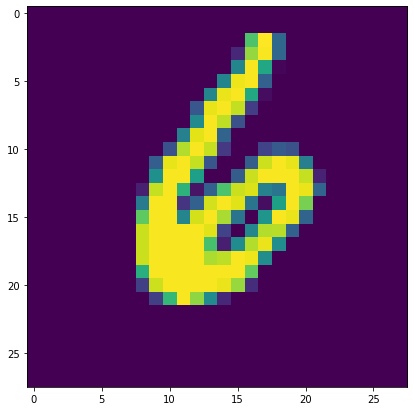

In [69]:
plt.figure(figsize=(7,7))
some_digit=1266
some_digit_image = x.iloc[some_digit].to_numpy()
plt.imshow(np.reshape(some_digit_image, (28,28)))
print(y[some_digit])

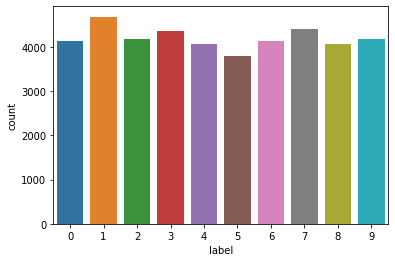

In [70]:
sns.countplot( x='label', data=data_df) 

In [71]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 40)

In [72]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
scaler.fit(x_train,y_train)
x_train = scaler.transform(x_train)
x_train.shape

(29400, 784)

In [100]:
from sklearn.neighbors import KNeighborsClassifier
#classifier = KNeighborsClassifier(n_neighbors = 3)
#classifier = KNeighborsClassifier(n_neighbors = 5)
#classifier = KNeighborsClassifier(n_neighbors = 7)
#classifier = KNeighborsClassifier(n_neighbors = 9)
classifier = KNeighborsClassifier(n_neighbors = 11)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [101]:
y_pred = classifier.predict(x_test)
y_pred

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([0, 2, 8, ..., 2, 4, 7])

In [102]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred))

0.8115079365079365


In [103]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.66      0.99      0.79      1236
           1       1.00      0.90      0.95      1370
           2       0.95      0.86      0.90      1252
           3       0.94      0.78      0.85      1369
           4       0.99      0.59      0.74      1215
           5       0.96      0.54      0.69      1132
           6       0.94      0.93      0.93      1216
           7       0.95      0.84      0.89      1326
           8       0.47      0.96      0.64      1197
           9       0.83      0.70      0.76      1287

    accuracy                           0.81     12600
   macro avg       0.87      0.81      0.81     12600
weighted avg       0.87      0.81      0.82     12600



In [104]:
print(confusion_matrix(y_test, y_pred))

[[1219    0    0    0    0    0    3    0   14    0]
 [   1 1239    8    4    0    0    6    1  111    0]
 [  96    0 1077    9    0    0    7    4   55    4]
 [  50    2   24 1067    0   14    3    7  199    3]
 [ 137    0    0    0  721    0   30    5  217  105]
 [ 147    0    1   42    1  608   24    2  302    5]
 [  67    1    0    0    0    4 1126    0   18    0]
 [  38    0   19    7    1    0    0 1112   84   65]
 [  31    0    5    1    1    3    2    0 1152    2]
 [  53    0    0    2    3    6    2   42  275  904]]


In [105]:
df = pd.read_csv("test.csv")
y_pred_test = classifier.predict(x_test)
y_pred_test

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([0, 2, 8, ..., 2, 4, 7])